# Project 2
## Step 1: Exploring your data.

##### Load your data in using Pandas and start to explore. Save all of your early exploration code here and include in your final submission.

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fpath = '../assets/billboard.csv'
df = pd.read_csv(fpath)
df

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2000,Janet,Doesn't Really Matter,4:17,Rock,2000-06-17,2000-08-26,59,52.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2000,Destiny's Child,Say My Name,4:31,Rock,1999-12-25,2000-03-18,83,83.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2000,"Iglesias, Enrique",Be With You,3:36,Latin,2000-04-01,2000-06-24,63,45.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2000,Sisqo,Incomplete,3:52,Rock,2000-06-24,2000-08-12,77,66.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,81,54.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Write a brief description of your data, and any interesting observations you've made thus far. 

The data is about tracks released in 2000 and it details their length, genre, the date they entered the billboard 100,
the date they peaked in the billboard 100, and its ranking for up to 76 weeks.

## Step 2: Clean your data.

##### Do some rudimentary cleaning. Rename any columns that are poorly named, shorten any strings that may be too long, fill in any missing values. Explain your rationale for the way you choose to "impute" the missing data.

In [4]:
cols = []
for i in range(len(df.columns)):
    list2 = list(df.columns[i])
    for j in list2:
        if j == "x":
            list2.remove(j)
    cols.append("".join(list2))
df.columns = cols
df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,1st.week,2nd.week,3rd.week,...,67th.week,68th.week,69th.week,70th.week,71st.week,72nd.week,73rd.week,74th.week,75th.week,76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Using Pandas' built in `melt` function, pivot the weekly ranking data to be long rather than wide. As a result, you will have removed the 72 'week' columns and replace it with two: Week and Ranking. There will now be multiple entries for each song, one for each week on the Billboard rankings.

In [8]:
melted = pd.melt(df, id_vars = ['year', 'artist.inverted', 'track', 'time', 'genre', 'date.entered', 'date.peaked'])
melted.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,variable,value
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,1st.week,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,1st.week,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,1st.week,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,1st.week,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,1st.week,57.0


In [13]:
df.dtypes

year                 int64
artist.inverted     object
track               object
time                object
genre               object
date.entered        object
date.peaked         object
1st.week             int64
2nd.week           float64
3rd.week           float64
4th.week           float64
5th.week           float64
6th.week           float64
7th.week           float64
8th.week           float64
9th.week           float64
10th.week          float64
11th.week          float64
12th.week          float64
13th.week          float64
14th.week          float64
15th.week          float64
16th.week          float64
17th.week          float64
18th.week          float64
19th.week          float64
20th.week          float64
21st.week          float64
22nd.week          float64
23rd.week          float64
                    ...   
47th.week          float64
48th.week          float64
49th.week          float64
50th.week          float64
51st.week          float64
52nd.week          float64
5

In [20]:
#data by artist name and position 
artist = pd.pivot_table(df, index = ['artist.inverted'])
artist.head()

,10th.week,11th.week,12th.week,13th.week,14th.week,15th.week,16th.week,17th.week,18th.week,19th.week,...,71st.week,72nd.week,73rd.week,74th.week,75th.week,76th.week,7th.week,8th.week,9th.week,year
artist.inverted,,,,,,,,,,,,,,,,,,,,,
2 Pac,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,99.0,NaN,NaN,2000.0
2Ge+her,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.0
3 Doors Down,56.0,56.0,55.0,54.0,55.0,55.0,52.0,48.5,42.5,45.5,...,NaN,NaN,NaN,NaN,NaN,NaN,54.5,56.0,56.5,2000.0
504 Boyz,57.0,64.0,70.0,75.0,76.0,78.0,85.0,92.0,96.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,36.0,49.0,53.0,2000.0
98�,6.0,7.0,22.0,29.0,36.0,47.0,67.0,66.0,84.0,93.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,3.0,2000.0


In [18]:
# Let's look at the data by artist and track.
artist_track = pd.pivot_table(df, index = ['artist.inverted', 'track'])
artist_track.head()

10th.week  \
artist.inverted track                                                           
2 Pac           Baby Don't Cry (Keep Ya Head Up II)                       NaN   
2Ge+her         The Hardest Part Of Breaking Up (Is Getting Bac...        NaN   
3 Doors Down    Kryptonite                                               51.0   
                Loser                                                    61.0   
504 Boyz        Wobble Wobble                                            57.0   

                                                                    11th.week  \
artist.inverted track                                                           
2 Pac           Baby Don't Cry (Keep Ya Head Up II)                       NaN   
2Ge+her         The Hardest Part Of Breaking Up (Is Getting Bac...        NaN   
3 Doors Down    Kryptonite                                               51.0   
                Loser                                                    61.0   
504 Boyz        Wobble Wobble                                            64.0   

                                                                    12th.week  \
artist.inverted track                                                           
2 Pac           Baby Don't Cry (Keep Ya Head Up II)                       NaN   
2Ge+her         The Hardest Part Of Breaking Up (Is Getting Bac...        NaN   
3 Doors Down    Kryptonite                                               51.0   
                Loser                                                    59.0   
504 Boyz        Wobble Wobble                                            70.0   

                                                                    13th.week  \
artist.inverted track                                                           
2 Pac           Baby Don't Cry (Keep Ya Head Up II)                       NaN   
2Ge+her         The Hardest Part Of Breaking Up (Is Getting Bac...        NaN   
3 Doors Down    Kryptonite                                               47.0   
                Loser                                                    61.0   
504 Boyz        Wobble Wobble                                            75.0   

                                                                    14th.week  \
artist.inverted track                                                           
2 Pac           Baby Don't Cry (Keep Ya Head Up II)                       NaN   
2Ge+her         The Hardest Part Of Breaking Up (Is Getting Bac...        NaN   
3 Doors Down    Kryptonite                                               44.0   
                Loser                                                    66.0   
504 Boyz        Wobble Wobble                                            76.0   

                                                                    15th.week  \
artist.inverted track                                                           
2 Pac           Baby Don't Cry (Keep Ya Head Up II)                       NaN   
2Ge+her         The Hardest Part Of Breaking Up (Is Getting Bac...        NaN   
3 Doors Down    Kryptonite                                               38.0   
                Loser                                                    72.0   
504 Boyz        Wobble Wobble                                            78.0   

                                                                    16th.week  \
artist.inverted track                                                           
2 Pac           Baby Don't Cry (Keep Ya Head Up II)                       NaN   
2Ge+her         The Hardest Part Of Breaking Up (Is Getting Bac...        NaN   
3 Doors Down    Kryptonite                                               28.0   
                Loser                                                    76.0   
504 Boyz        Wobble Wobble                                            85.0   

                                                                    17th.week  \
artist.inve

In [31]:
# number of weeks on chart
weeksonchart = 76-df.isnull().sum(axis=1)
artistrackweeks = pd.concat([weeksonchart, df], axis = 1)
fintab = artistrackweeks[[0, 'artist.inverted', 'track']]
fintab.columns = ['#weeks.on.chart', 'artist.inverted', 'track']
fintab.head()

,#weeks.on.chart,artist.inverted,track
0,28,Destiny's Child,Independent Women Part I
1,26,Santana,"Maria, Maria"
2,33,Savage Garden,I Knew I Loved You
3,24,Madonna,Music
4,21,"Aguilera, Christina",Come On Over Baby (All I Want Is You)


In [40]:
avg=np.mean(fintab['#weeks.on.chart'])
avg

16.741324921135647

In [43]:
weeks_artist= pd.pivot_table(fintab, index = ['artist.inverted'], values = ['#weeks.on.chart'], aggfunc = np.sum).sort('#weeks.on.chart', ascending = False)
weeks_artist.head()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,#weeks.on.chart
artist.inverted,
Creed,104
Lonestar,95
Destiny's Child,92
Sisqo,74
N'Sync,74


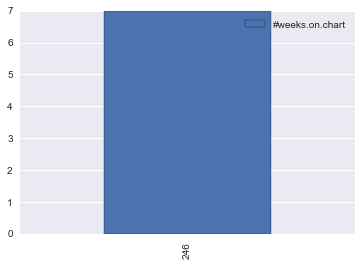

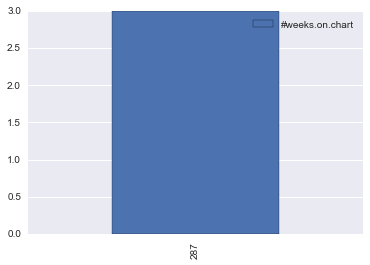

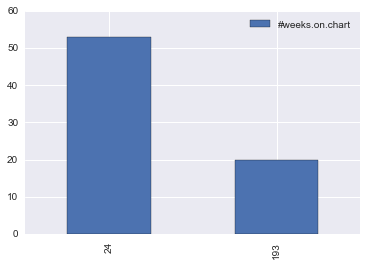

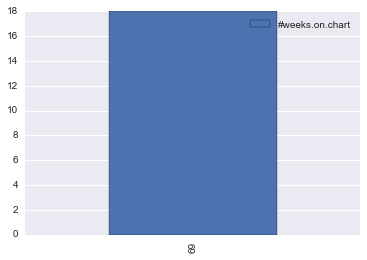

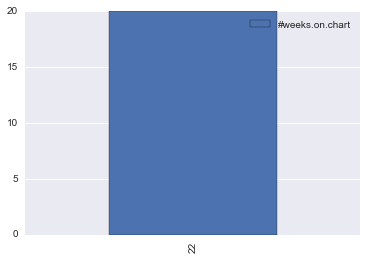

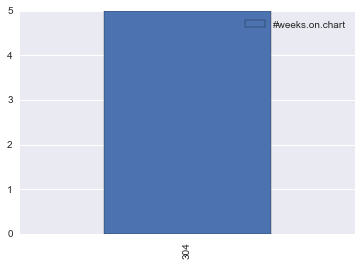

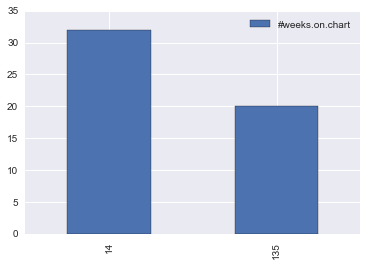

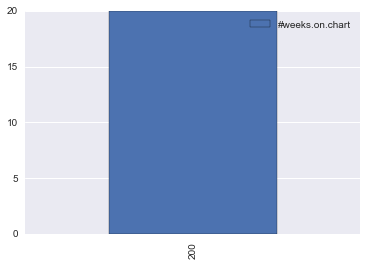

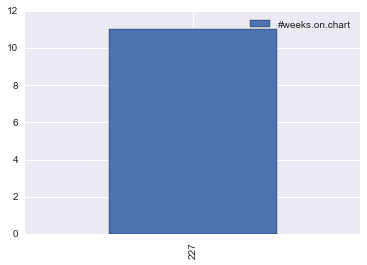

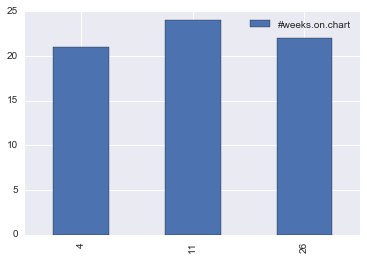

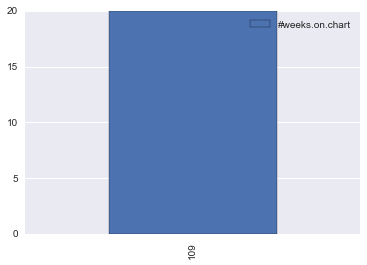

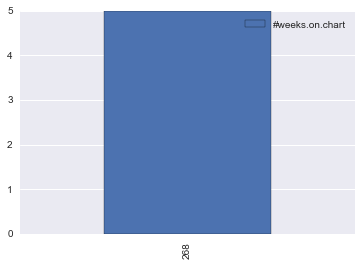

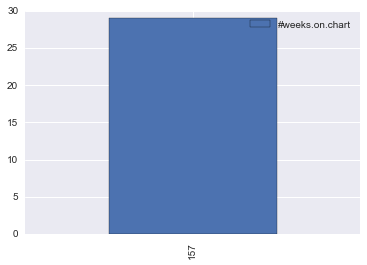

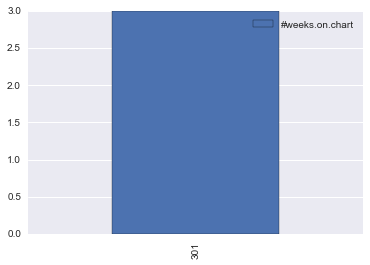

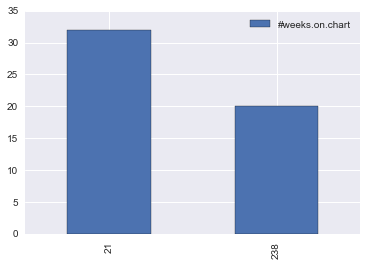

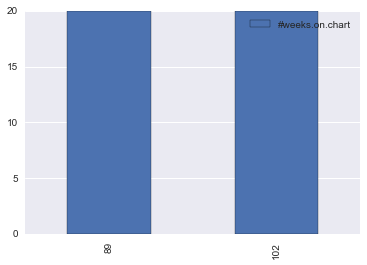

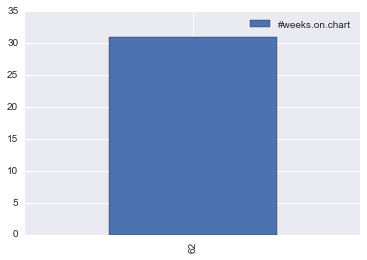

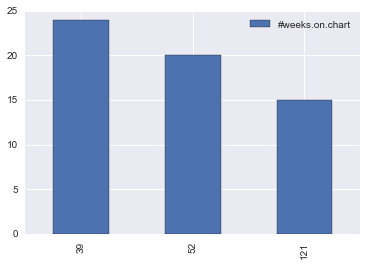

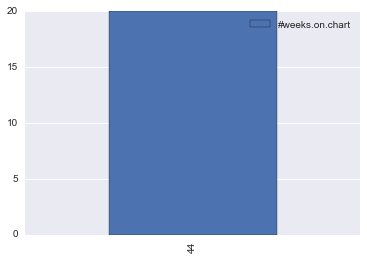

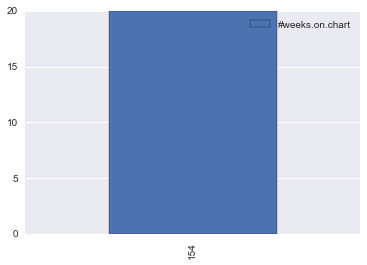

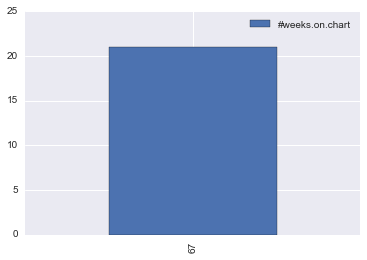

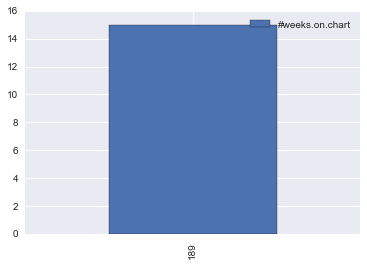

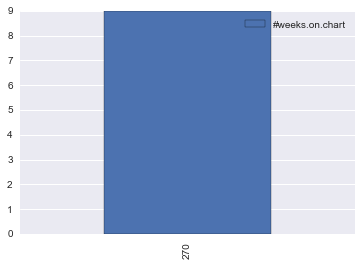

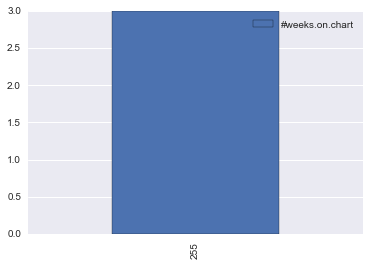

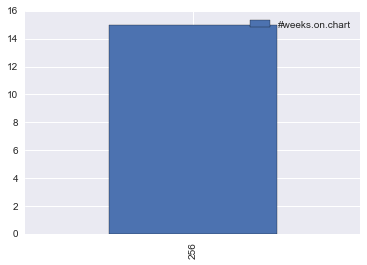

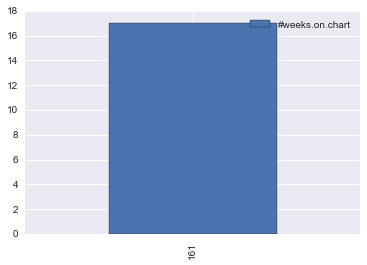

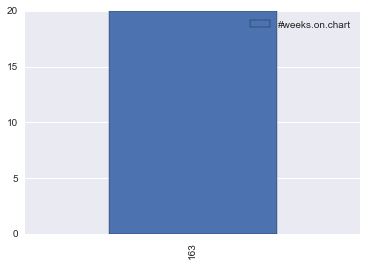

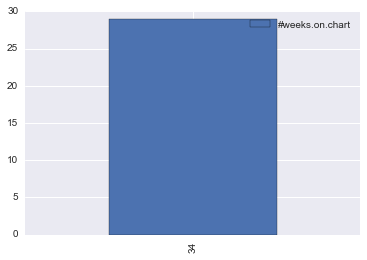

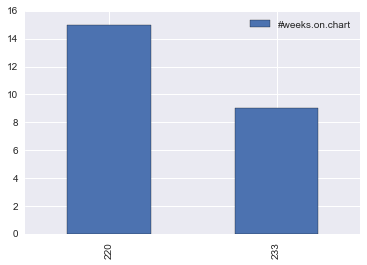

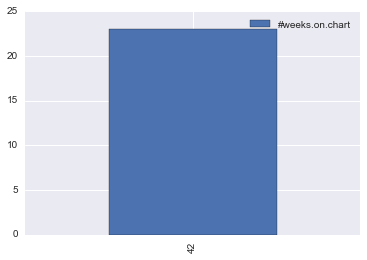

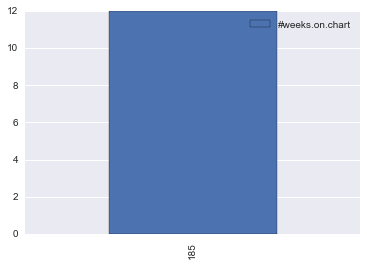

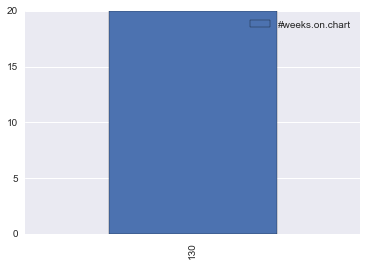

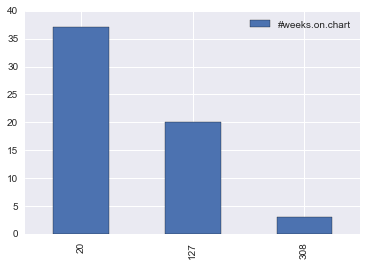

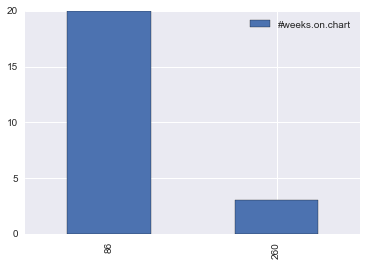

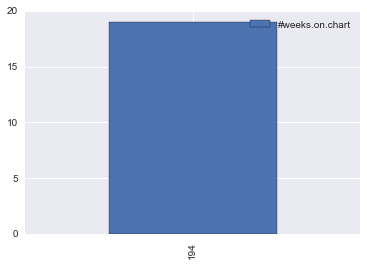

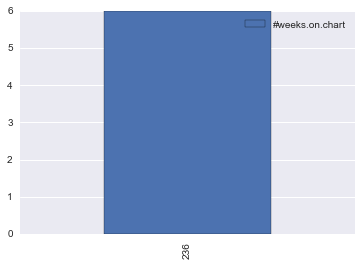

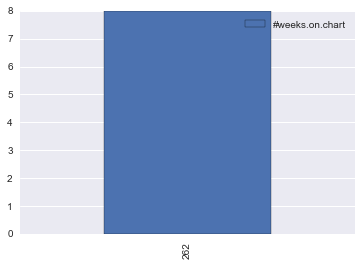

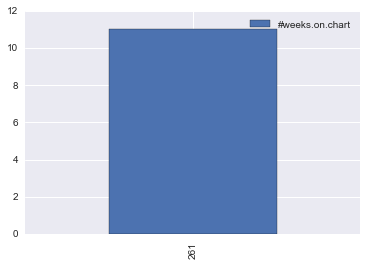

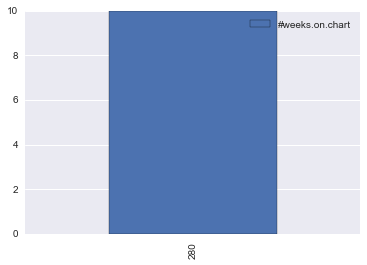

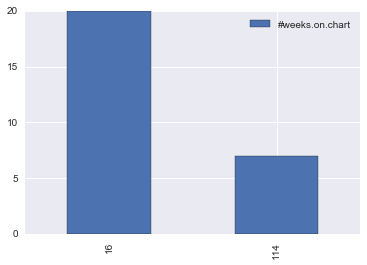

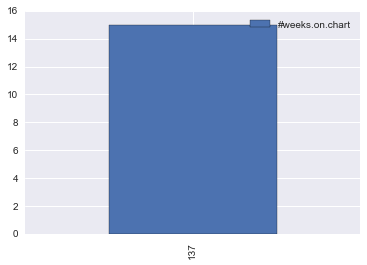

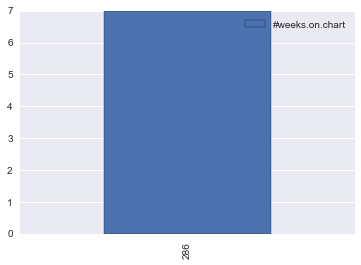

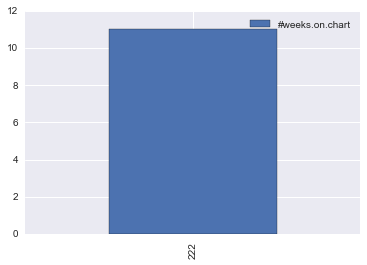

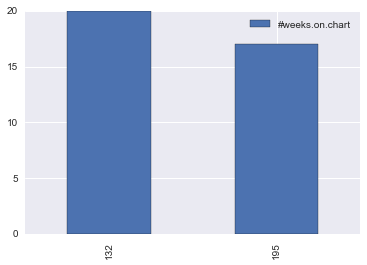

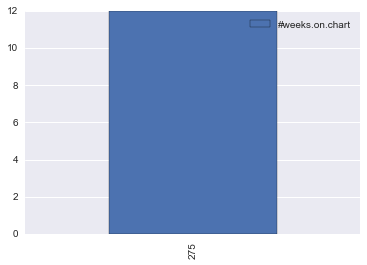

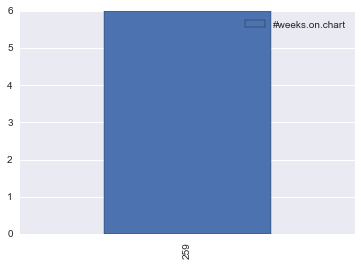

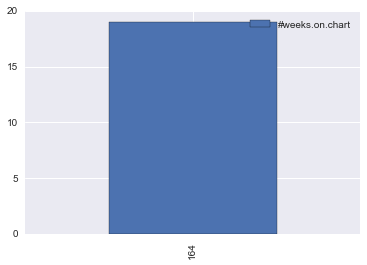

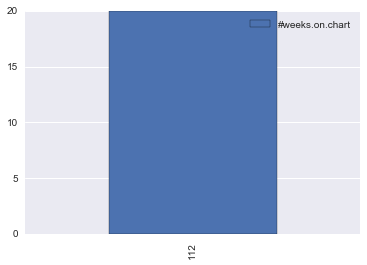

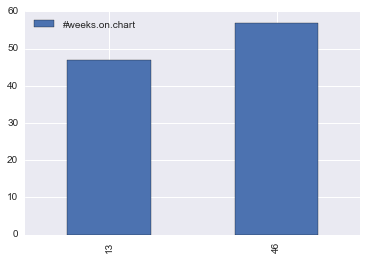

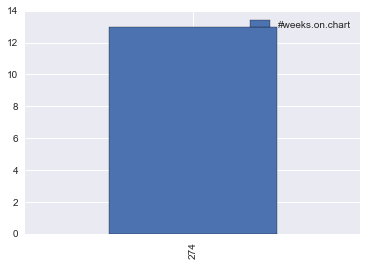

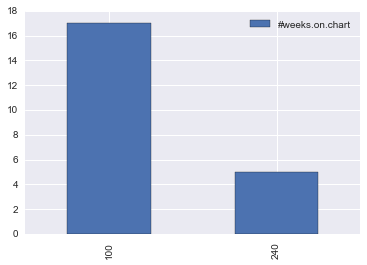

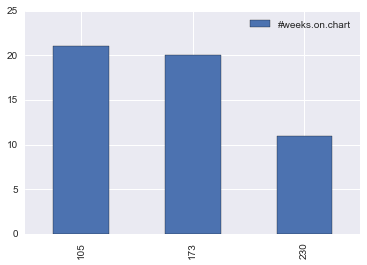

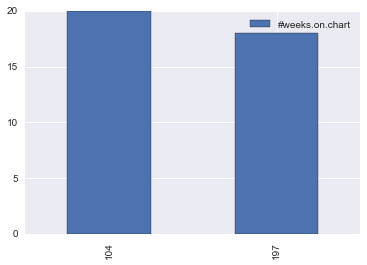

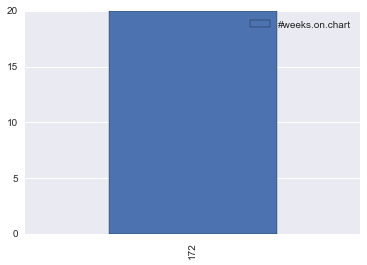

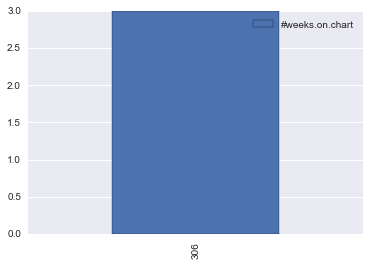

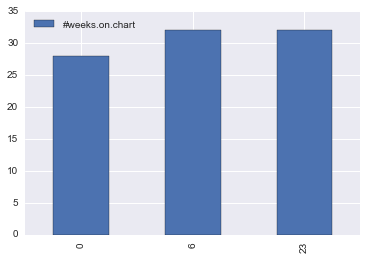

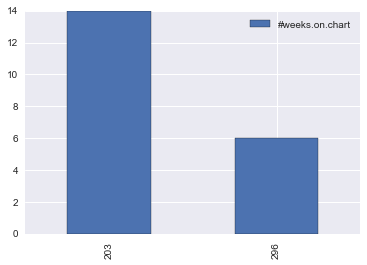

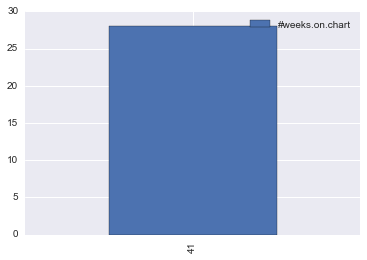

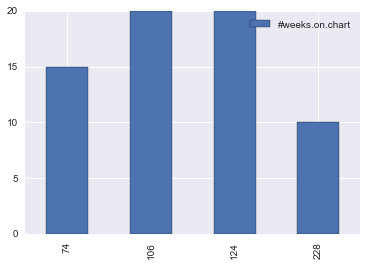

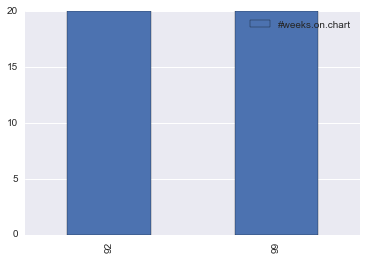

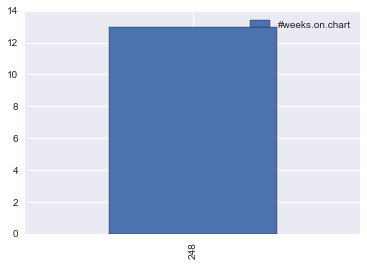

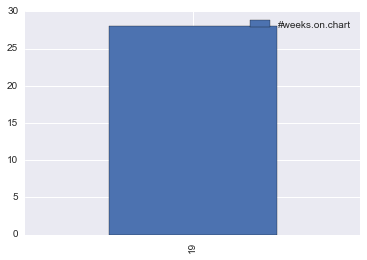

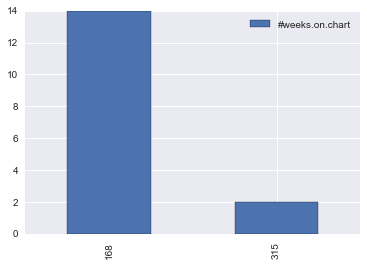

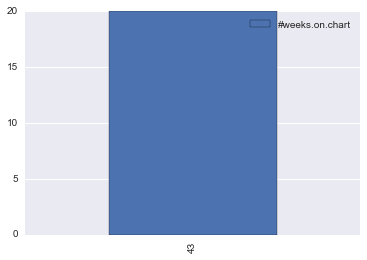

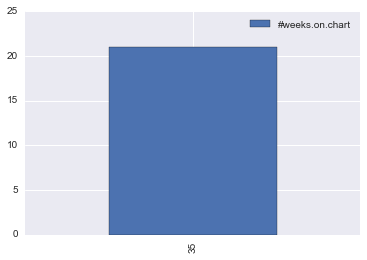

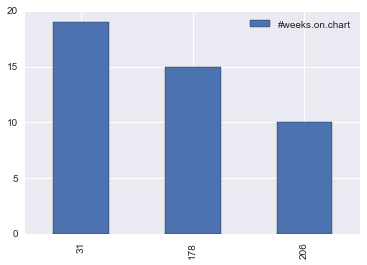

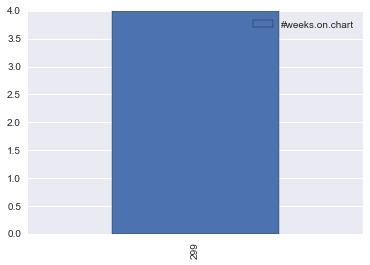

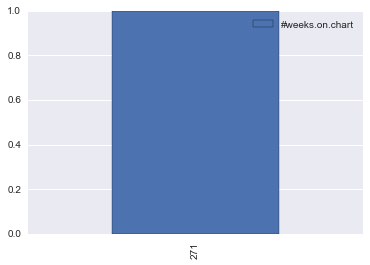

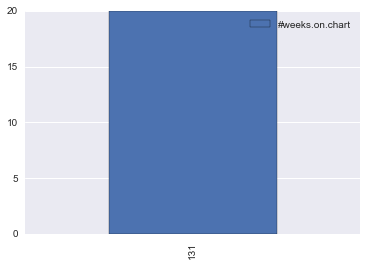

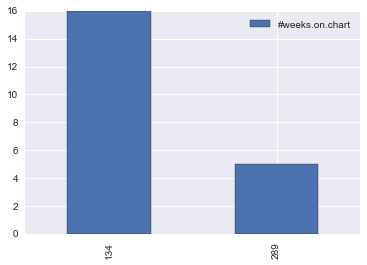

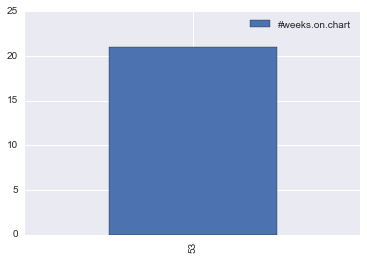

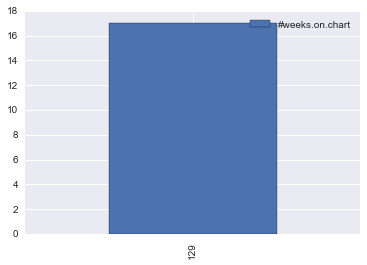

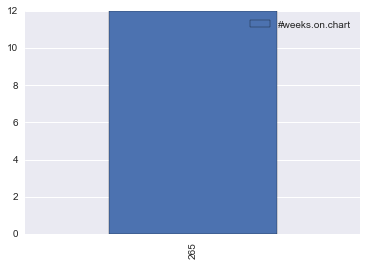

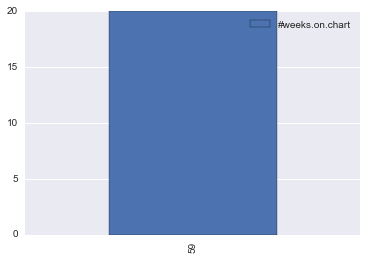

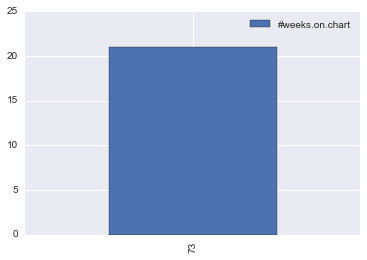

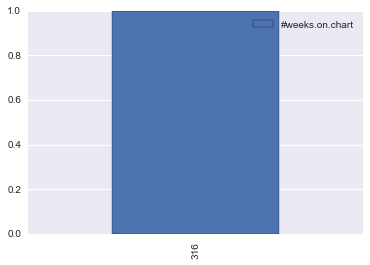

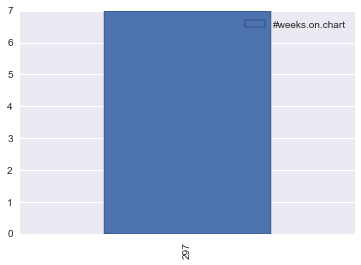

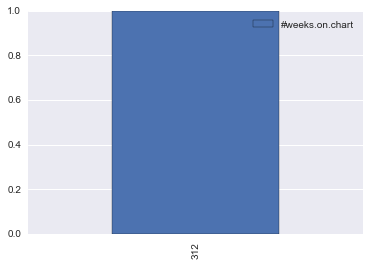

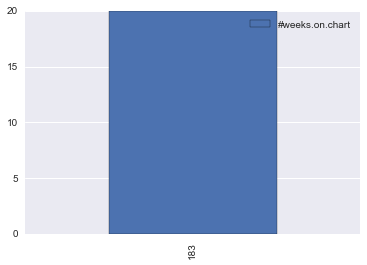

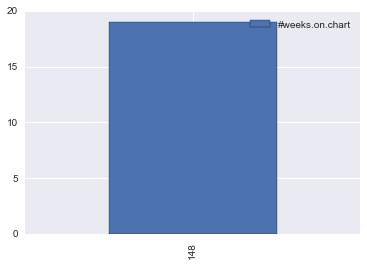

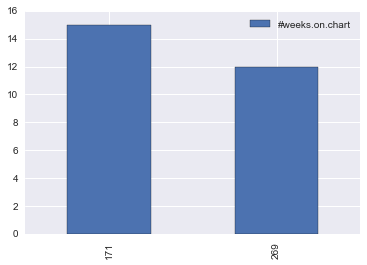

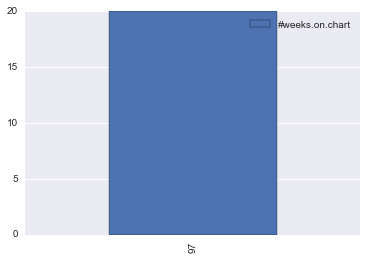

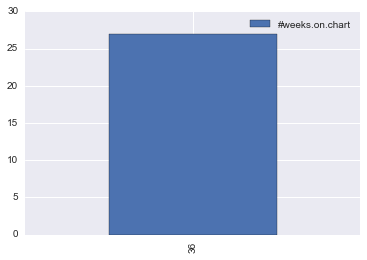

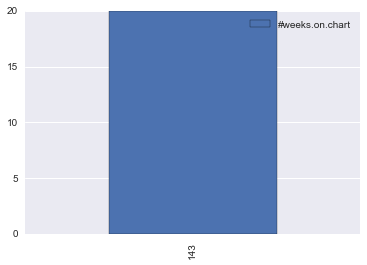

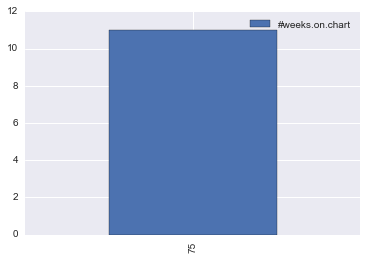

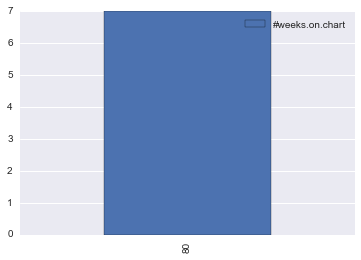

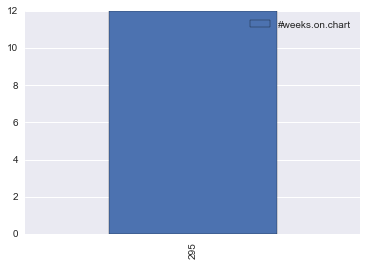

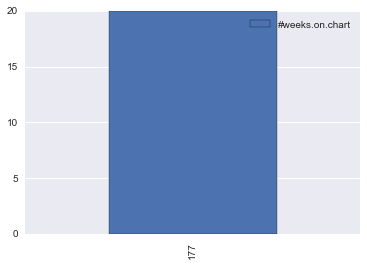

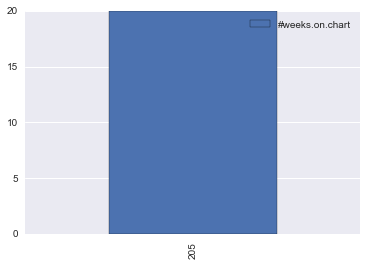

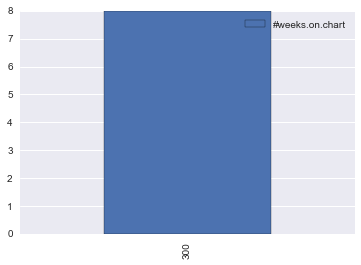

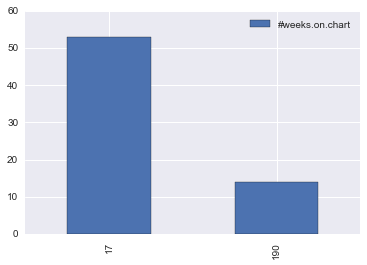

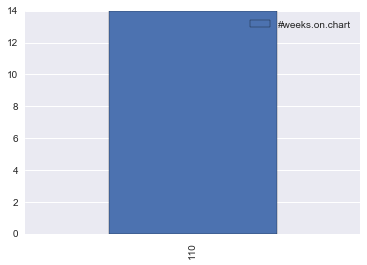

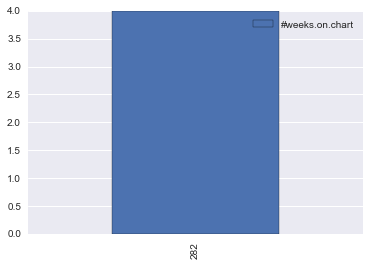

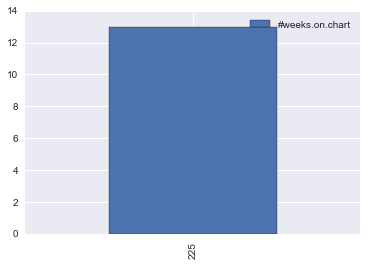

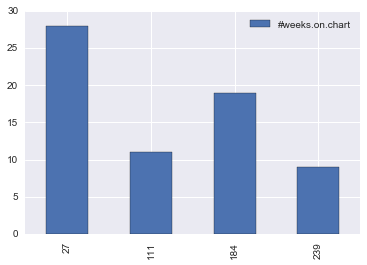

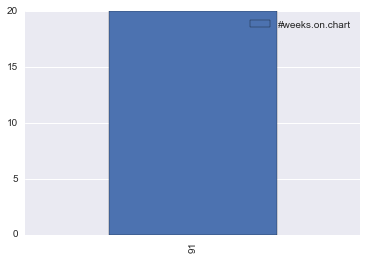

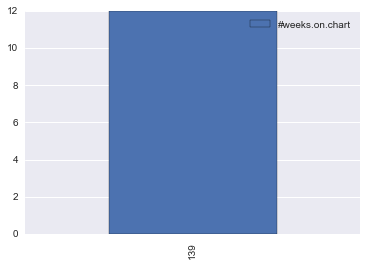

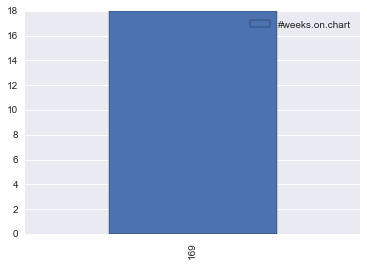

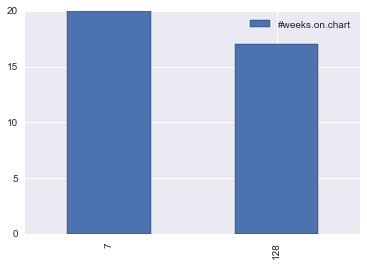

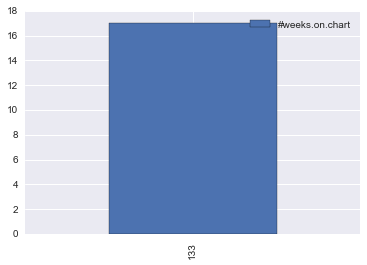

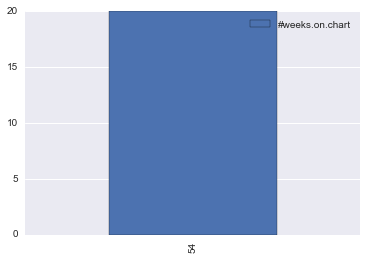

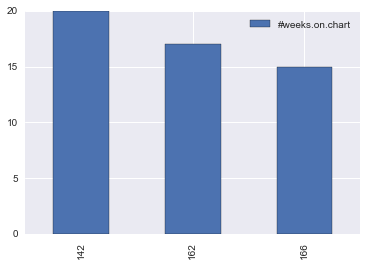

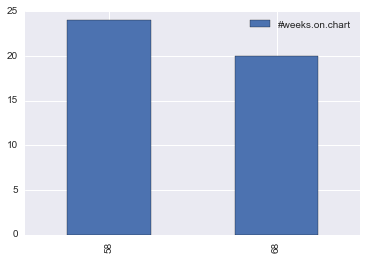

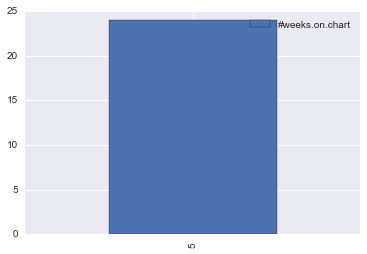

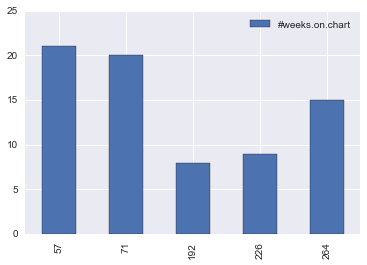

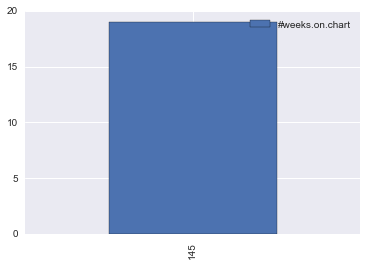

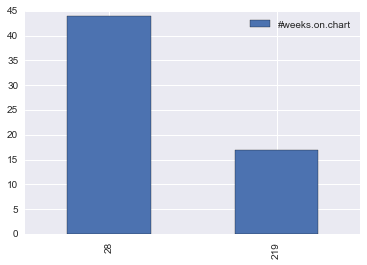

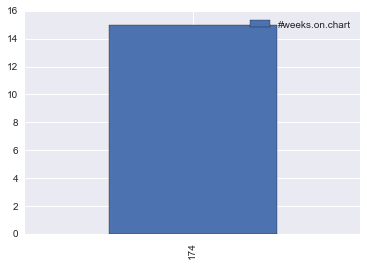

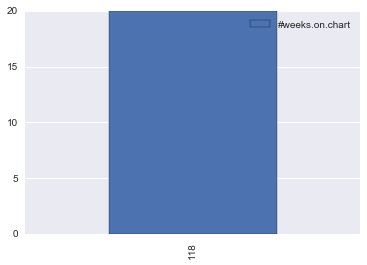

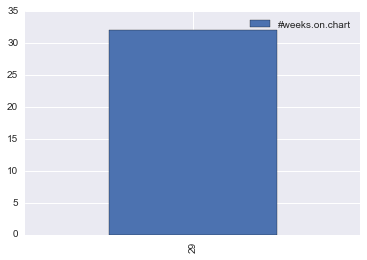

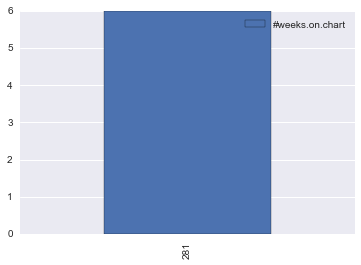

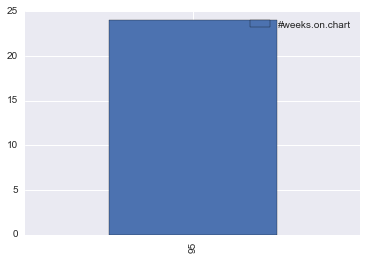

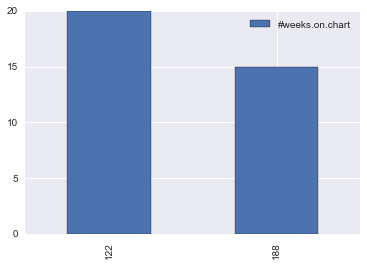

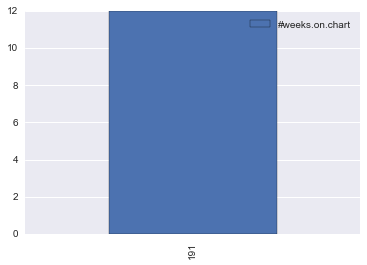

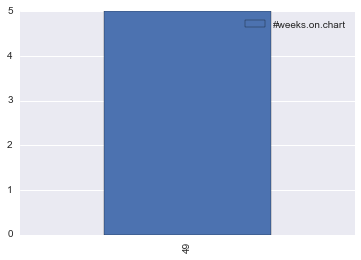

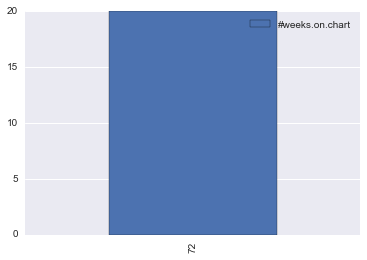

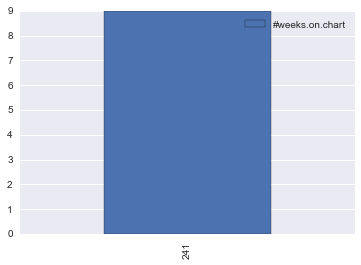

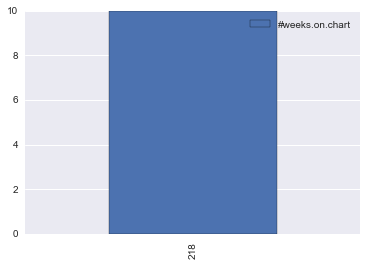

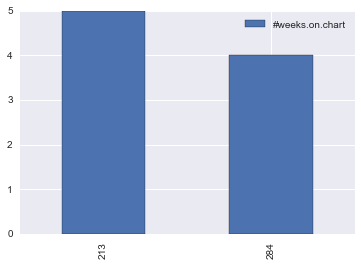

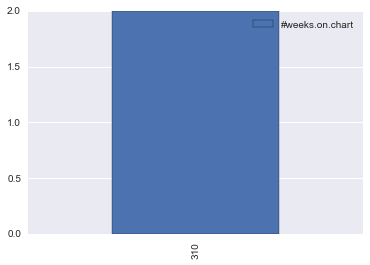

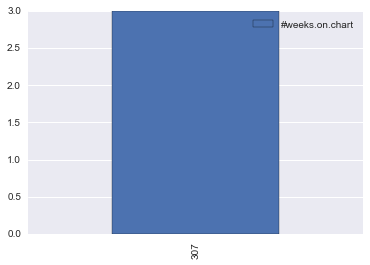

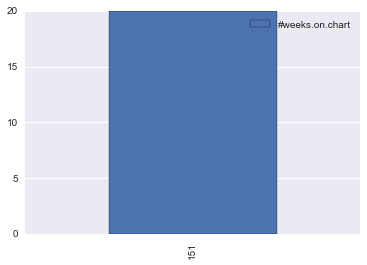

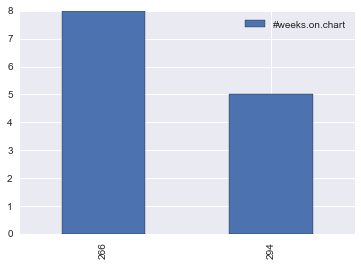

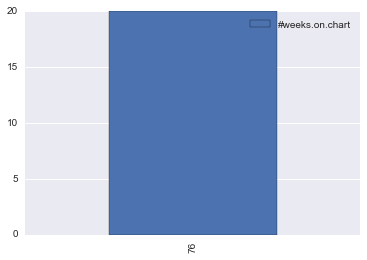

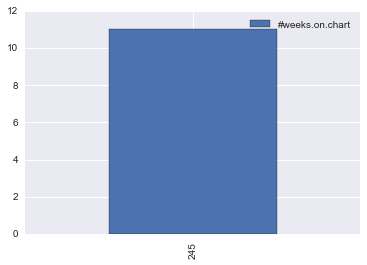

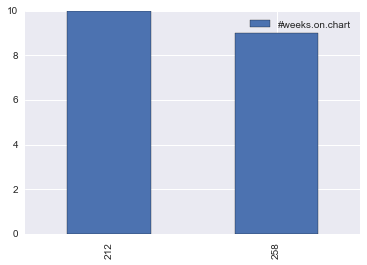

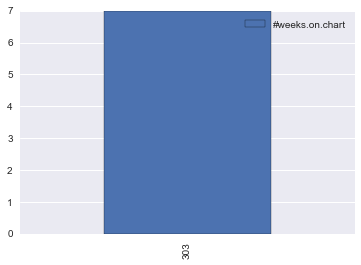

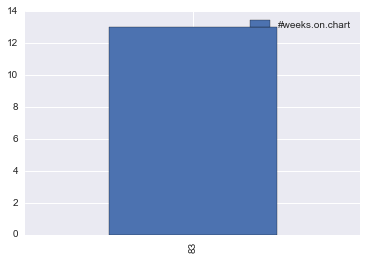

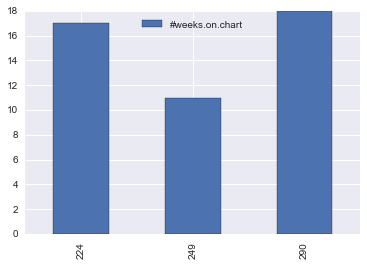

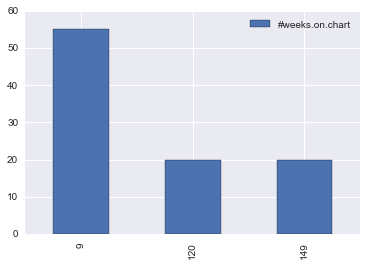

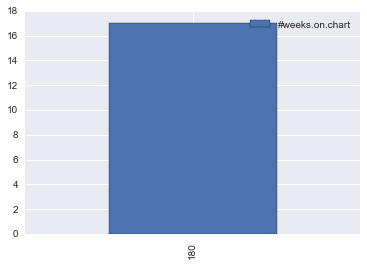

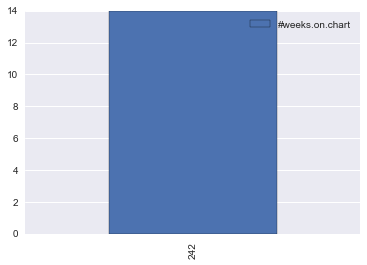

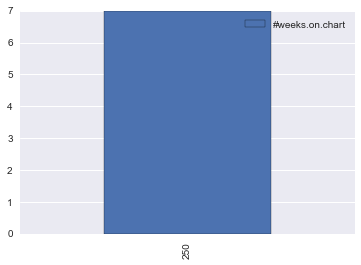

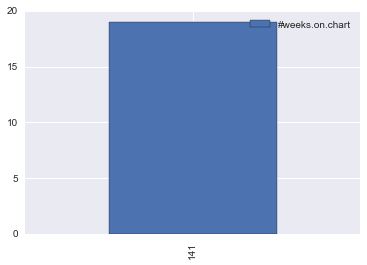

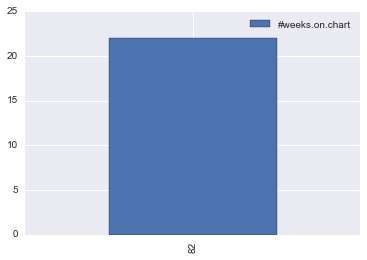

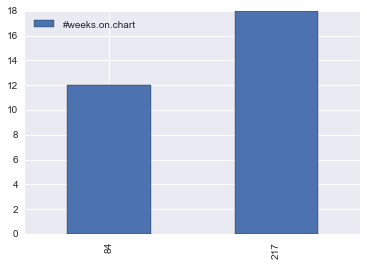

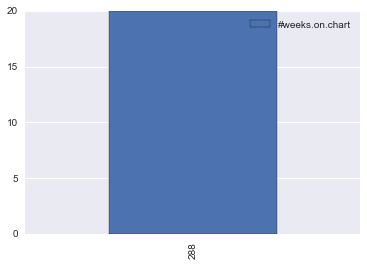

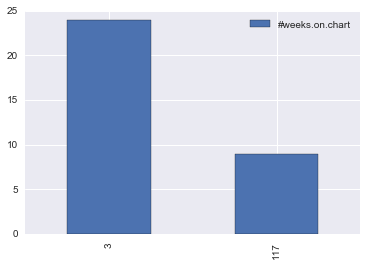

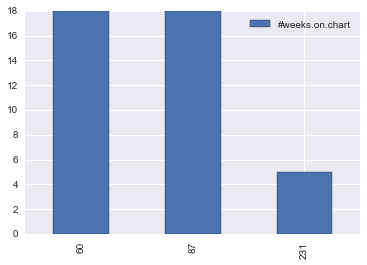

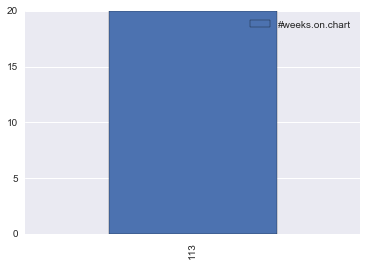

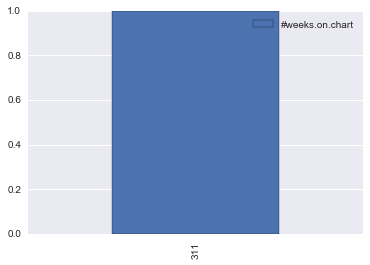

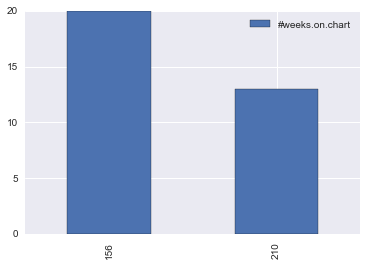

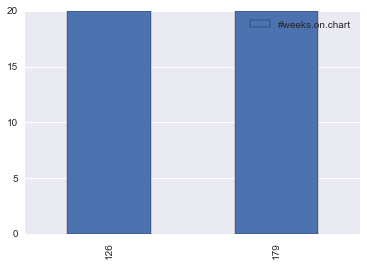

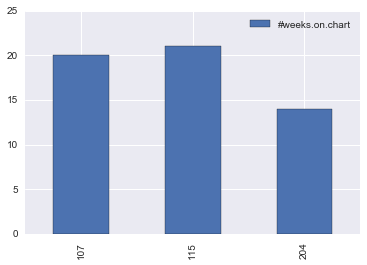

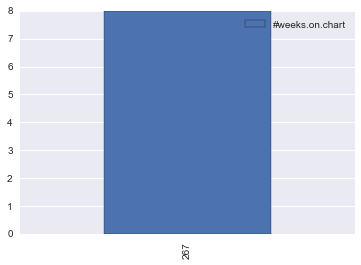

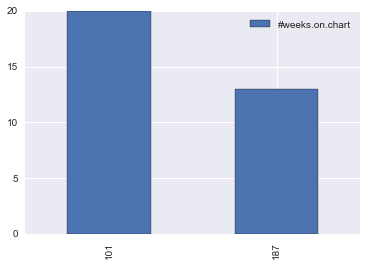

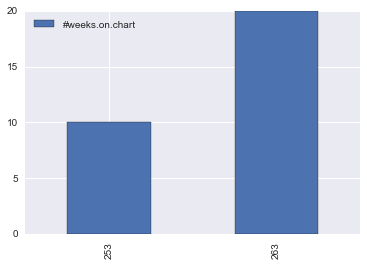

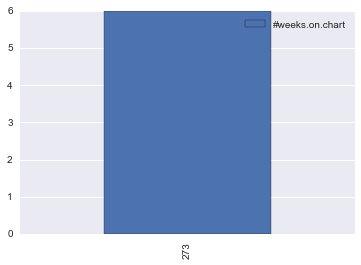

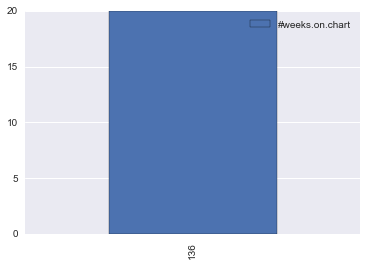

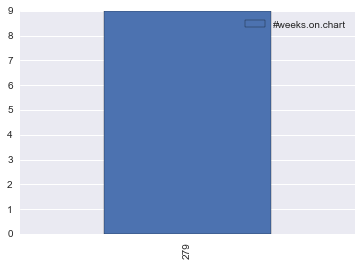

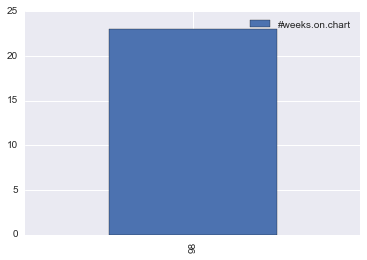

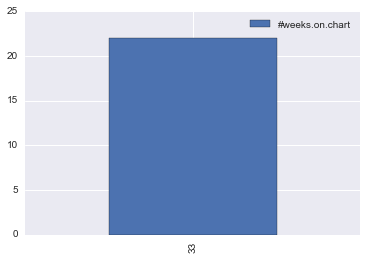

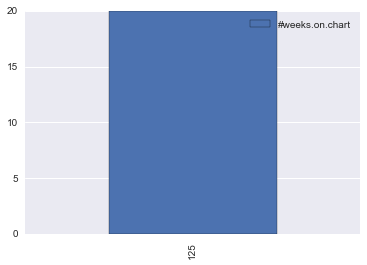

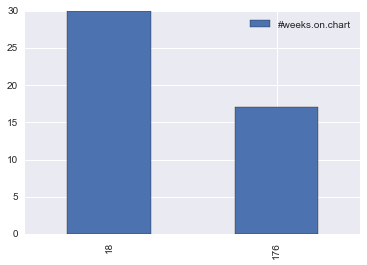

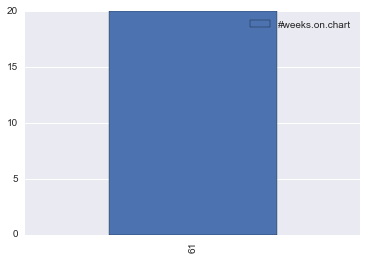

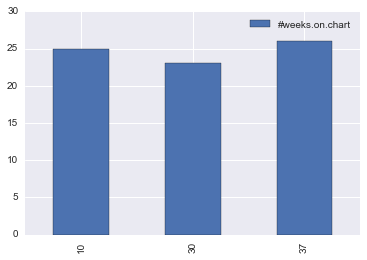

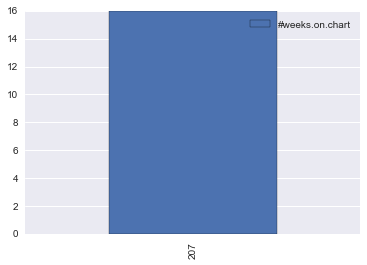

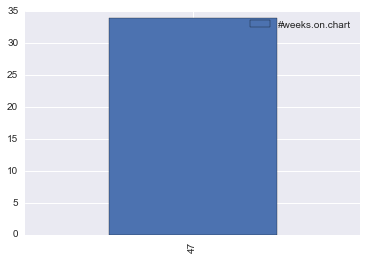

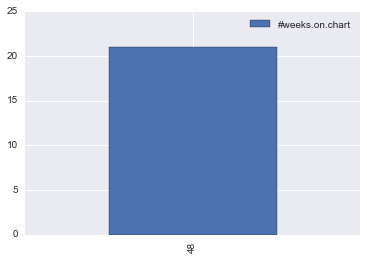

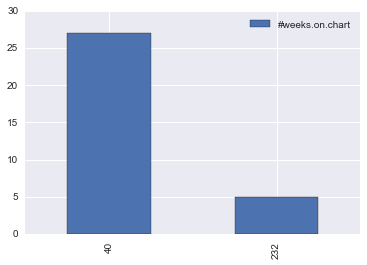

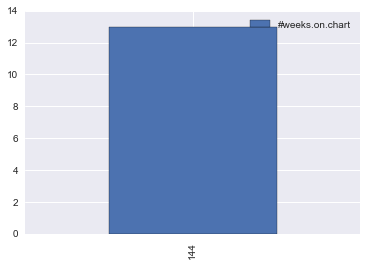

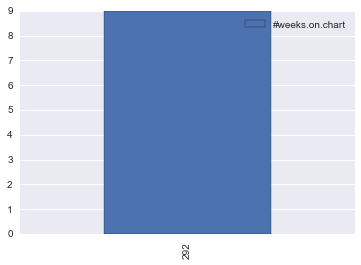

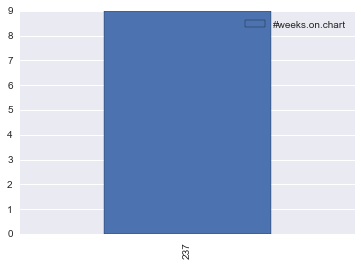

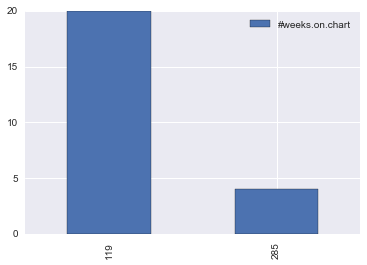

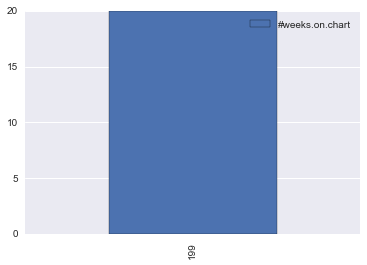

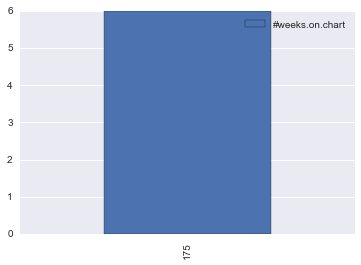

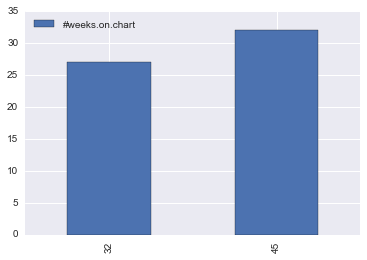

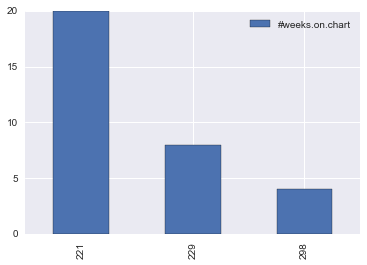

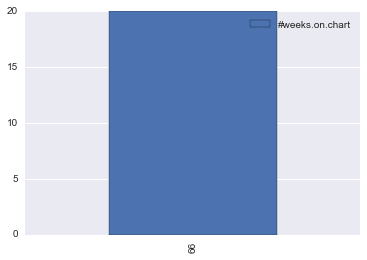

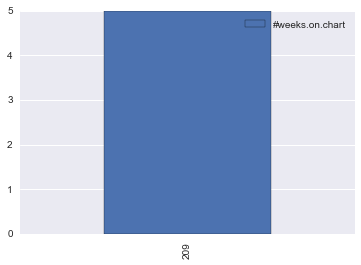

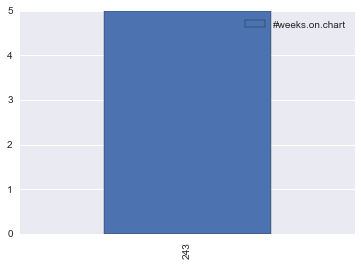

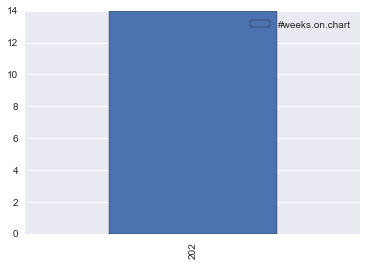

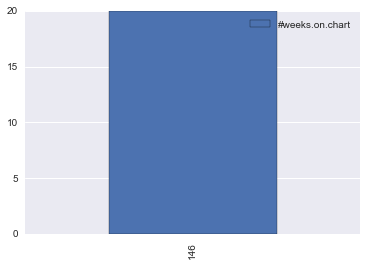

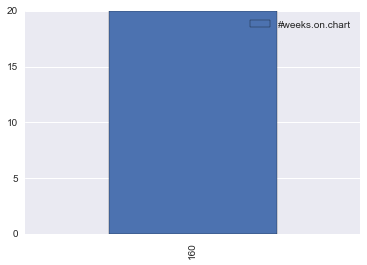

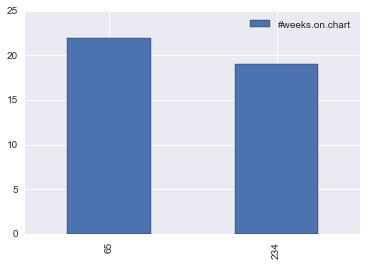

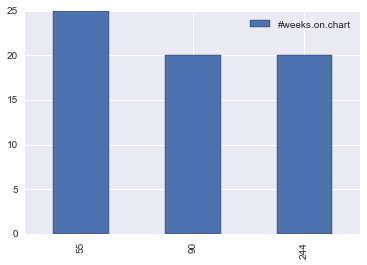

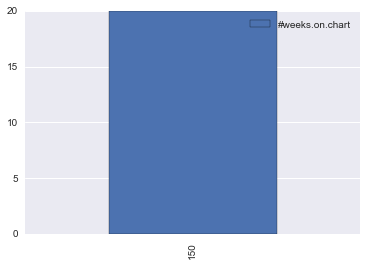

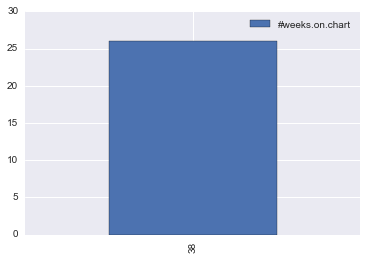

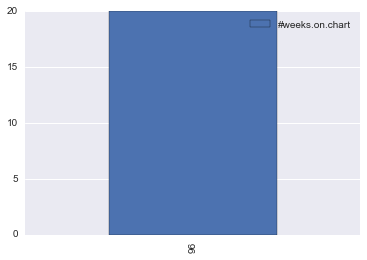

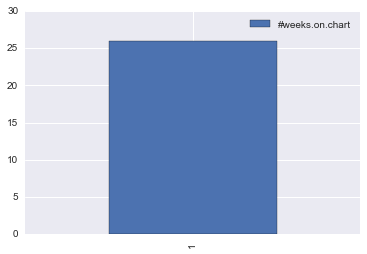

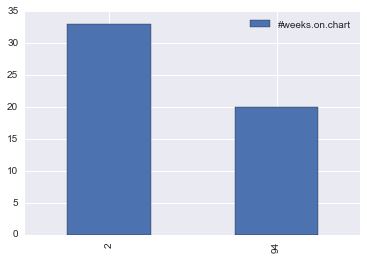

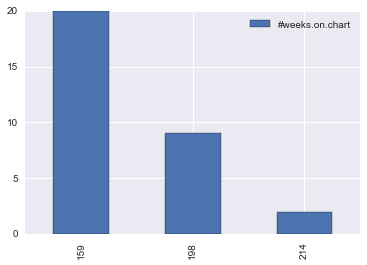

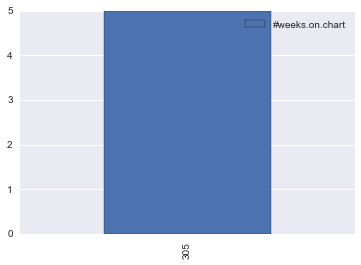

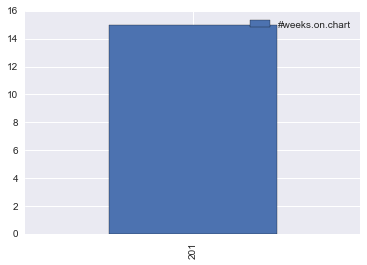

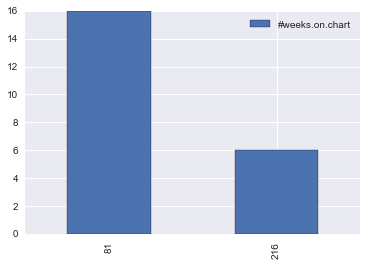

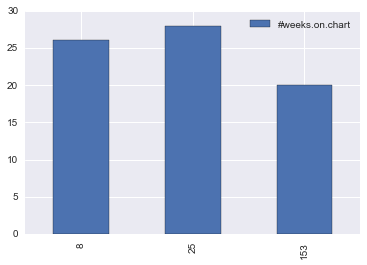

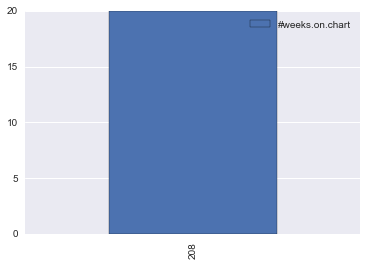

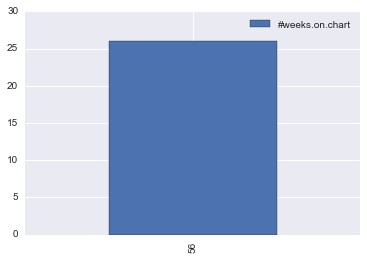

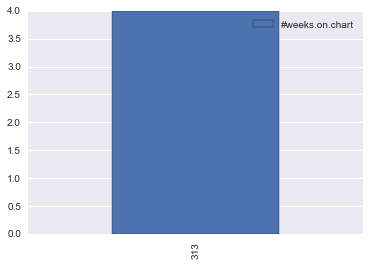

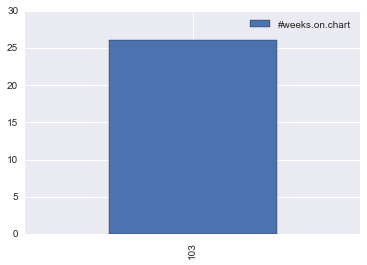

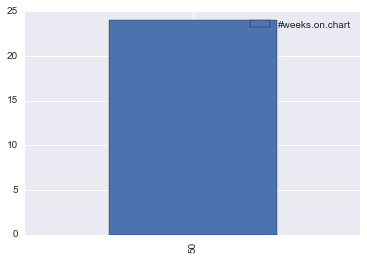

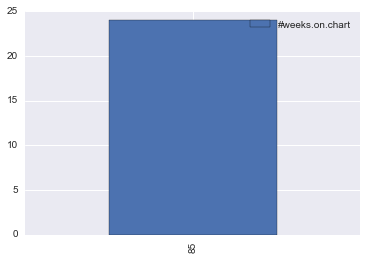

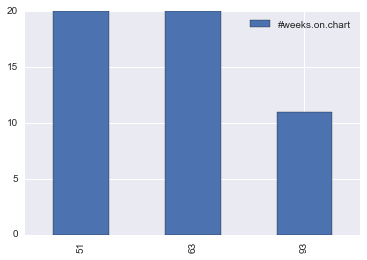

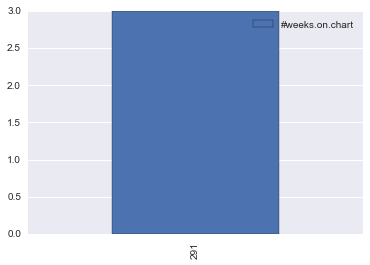

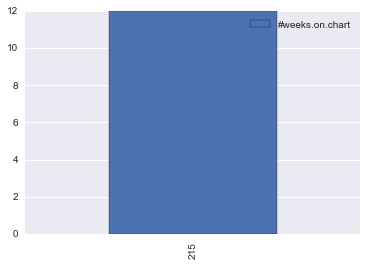

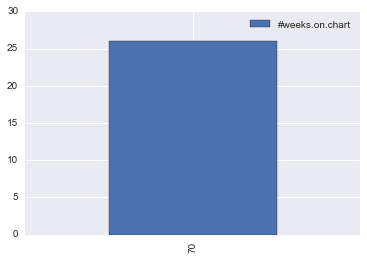

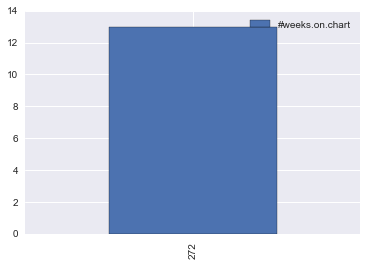

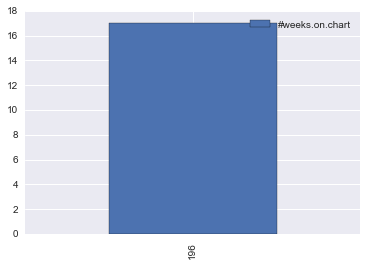

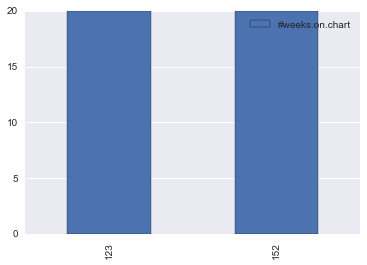

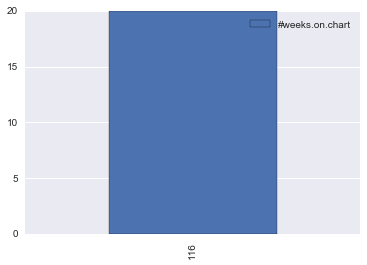

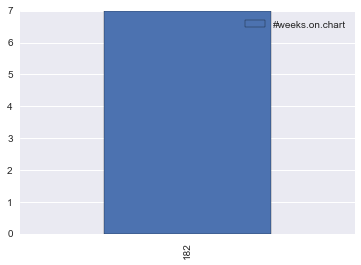

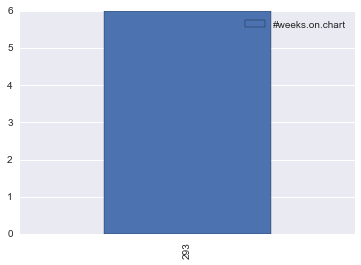

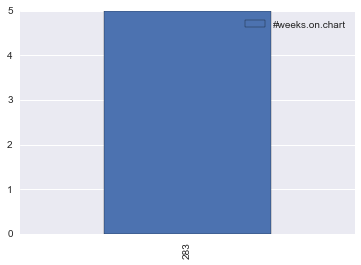

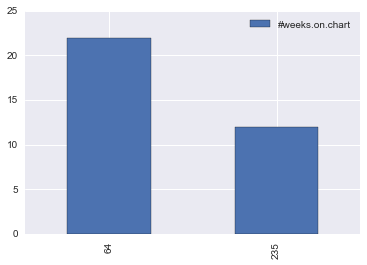

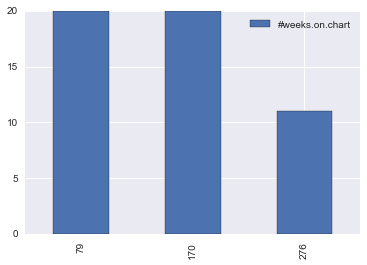

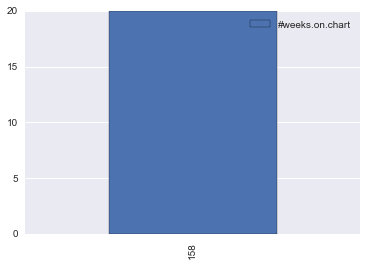

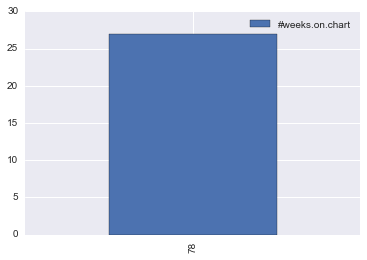

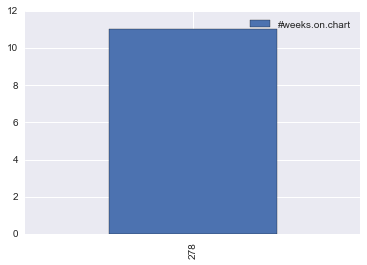

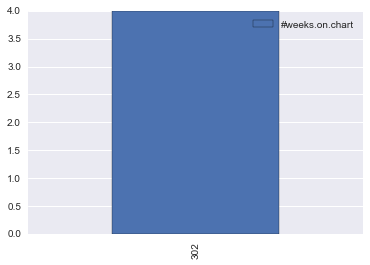

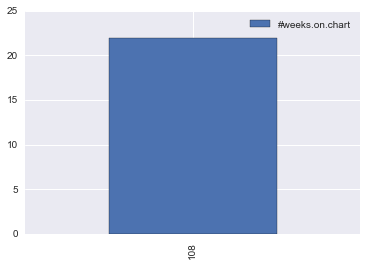

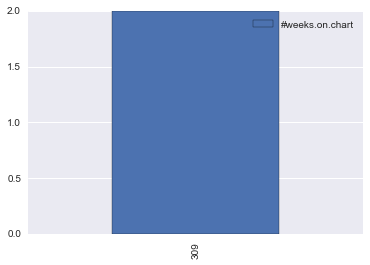

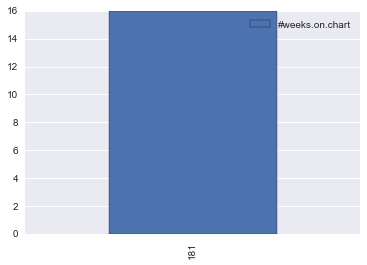

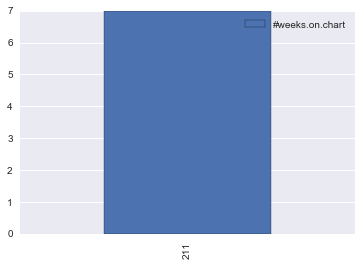

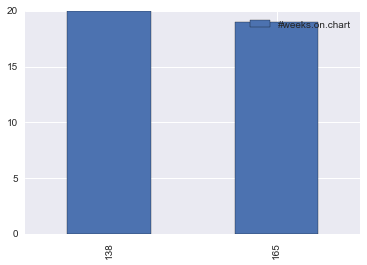

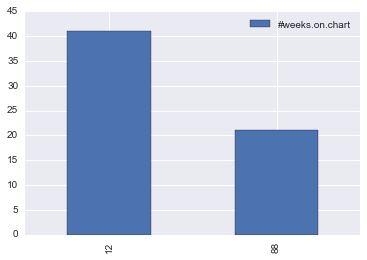

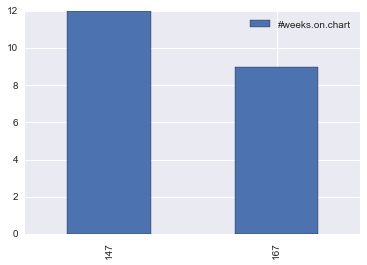

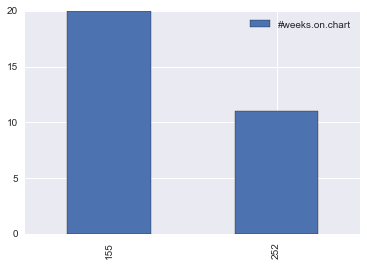

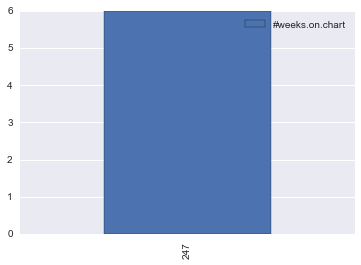

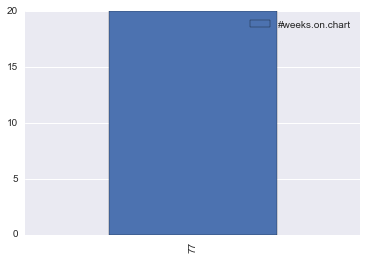

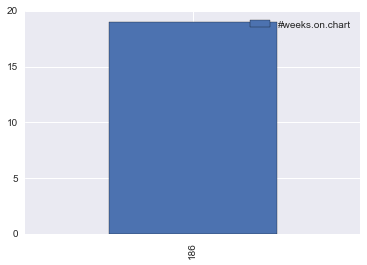

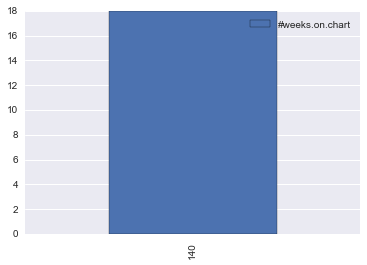

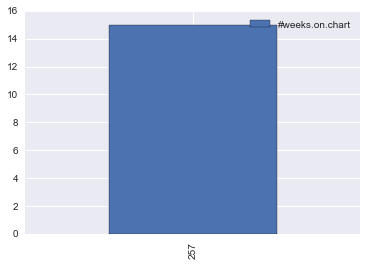

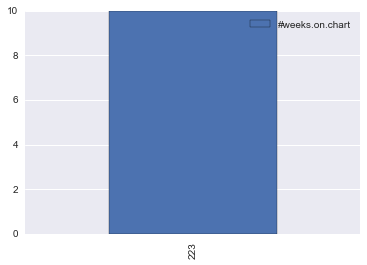

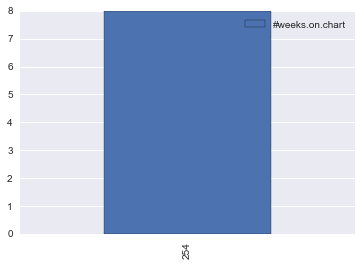

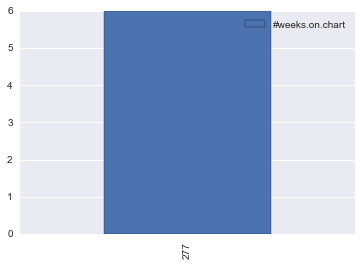

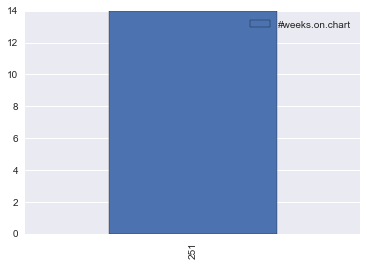

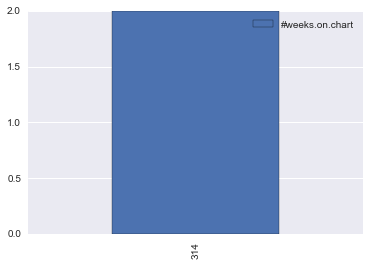

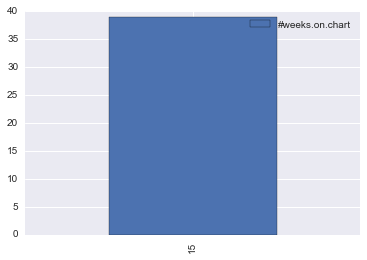

In [50]:
tracksartist = fintab.groupby(['artist.inverted']).plot(kind = 'bar')

In [51]:
weeks_track= pd.pivot_table(fintab, index = ['track'], values = ['#weeks.on.chart'], aggfunc = np.sum).sort('#weeks.on.chart', ascending = False)
weeks_track.head()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,#weeks.on.chart
track,
Higher,57
Amazed,55
Kryptonite,53
Breathe,53
With Arms Wide Open,47


## Step 3: Visualize your data.

##### Using a plotting utility of your choice (Tableau or python modules or both), create visualizations that will provide context to your data. There is no minimum or maximum number of graphs you should generate, but there should be a clear and consistent story being told. Give insights to the distribution, statistics, and relationships of the data. 

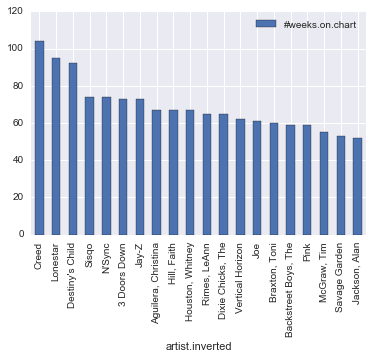

In [55]:
weeks_artist.head(20).plot(kind='bar')

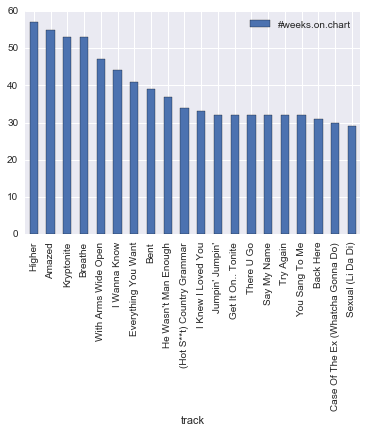

In [53]:
weeks_track.head(20).plot(kind = 'bar')

## Step 4: Create a Problem Statement.

##### Having explored the data, come up with a problem statement for this data set. You can feel free to introduce data from any other source to support your problem statement, just be sure to provide a link to the origin of the data. Once again- be creative!

## Step 5: Brainstorm your Approach.
##### In bullet-list form, provide a proposed approach for evaluating your problem statement. This can be somewhat high-level, but start to think about ways you can massage the data for maximum efficacy. 

## Step 6: Create a blog post with your code snippets and visualizations.
##### Data Science is a growing field, and the Tech industry thrives off of collaboration and sharing of knowledge. Blogging is a powerful means for pushing the needle forward in our field. Using your blogging platform of choice, create a post describing each of the 5 steps above. Rather than writing a procedural text, imagine you're describing the data, visualizations, and conclusions you've arrived at to your peers. Aim for a minimum of 500 words. 

## BONUS: The Content Managers working for the Podcast Publishing Company have recognized you as a thought leader in your field. They've asked you to pen a white paper (minimum 500 words) on the subject of 'What It Means To Have Clean Data'. This will be an opinion piece read by a wide audience, so be sure to back up your statements with real world examples or scenarios.

##### Hint: To get started, look around on the internet for articles, blog posts, papers, youtube videos, podcasts, reddit discussions, anything that will help you understand the challenges and implications of dealing with big data. This should be a personal reflection on everything you've learned this week, and the learning goals that have been set out for you going forward. 